In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
X_train = pd.read_csv('data/X_train.csv')
y_train = pd.read_csv('data/y_train.csv')

X_test = pd.read_csv('data/X_test.csv')
y_test = pd.read_csv('data/y_test.csv')

df= pd.read_csv('data/model_data.csv')

In [3]:
# Initialize the model
linear_model = LinearRegression()

In [4]:
# Train the model
linear_model.fit(X_train, y_train)

LinearRegression()

In [5]:
# Make predictions
y_pred_linear = linear_model.predict(X_test)

In [6]:
# Evaluate the model
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)
r2_linear = r2_score(y_test, y_pred_linear)

In [7]:
print(f"Linear Regression - MAE: {mae_linear}, RMSE: {rmse_linear}, R²: {r2_linear}")

Linear Regression - MAE: 1531376160016.7788, RMSE: 4943838855366.396, R²: -8.174982624156211e+26


## Normalizing data for better performance

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Retrain the model with scaled data
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

In [10]:
# Re-evaluate the model
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)
r2_linear = r2_score(y_test, y_pred_linear)

In [11]:
print(f"Linear Regression - MAE: {mae_linear}, RMSE: {rmse_linear}, R²: {r2_linear}")

Linear Regression - MAE: 3762903080683.4595, RMSE: 15950404979124.182, R²: -8.606418903521192e+27


### Linear Regression is not suitable for out Data

## Ridge Regression

In [12]:
from sklearn.linear_model import Ridge

# Initialize Ridge Regression with regularization parameter alpha (try different values for alpha)
ridge_model = Ridge(alpha=1.0)

# Train the model
ridge_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate the model
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression - MAE: {mae_ridge}, RMSE: {rmse_ridge}, R²: {r2_ridge}")


Ridge Regression - MAE: 0.18024394097235102, RMSE: 0.28134294156407613, R²: -1.5161577064191765


### This method is not very suitable either

## Random Forest

In [13]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest with basic parameters 
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regression - MAE: {mae_rf}, RMSE: {rmse_rf}, R²: {r2_rf}")


Random Forest Regression - MAE: 0.12762030923290307, RMSE: 0.1630045560737465, R²: 0.15289950522790102


### This model gives much better Results

## Hyperparameter Tuning for Random Forest

In [14]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_random = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                               param_distributions=param_dist,
                               n_iter=20, cv=5, random_state=42, n_jobs=-1)

rf_random.fit(X_train, y_train)

# Use best parameters
best_rf = rf_random.best_estimator_

# Make predictions and evaluate
y_pred_best_rf = best_rf.predict(X_test)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
rmse_best_rf = mean_squared_error(y_test, y_pred_best_rf, squared=False)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Tuned Random Forest - MAE: {mae_best_rf}, RMSE: {rmse_best_rf}, R²: {r2_best_rf}")


Tuned Random Forest - MAE: 0.09458203237924043, RMSE: 0.13562438098536367, R²: 0.4095196935793208


### Insights
- MAE: 0.094 - This indicates that, on average, our model's predictions are about 0.49 units off from the actual values.
- RMSE: 0.13 - This lower value indicates better predictive accuracy, especially in terms of the variance of errors.
- R²: 0.409 - This shows that the model now explains approximately 41% of the variance in the target variables, which is a good sign that the model is capturing more of the underlying data patterns.

## Feature Importance Analysis

In [15]:
# Get feature importances from the best model
feature_importances = best_rf.feature_importances_
feature_names = X_train.columns  # Update if necessary based on the final feature set
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

     Feature  Importance
530     soul    0.027784
306      joy    0.013955
264    heart    0.013561
570  tempest    0.012489
329     life    0.011973
..       ...         ...
233      fun    0.000035
510     skin    0.000034
466  relaxes    0.000033
164  durable    0.000023
372   monday    0.000000

[650 rows x 2 columns]


In [16]:
importances = best_rf.feature_importances_
for name, importance in zip(X_train.columns, importances):
    print(f"{name}: {importance}")


absolutely: 0.00024690458357208534
action: 0.0008900285276162068
activity: 0.0002756040323326636
add: 0.0004990600800780033
addition: 0.00030282629344914667
adult: 0.001625737244268608
adulthood: 0.0006501030609594499
adulting: 0.0005380796592409603
adventure: 0.0019978457638886084
adventurous: 0.003090395181204876
advice: 0.0009447550857780945
age: 0.0005995281266842182
agree: 0.0007024406962476511
algebra: 0.0001554852824102718
alone: 0.0005546952687620012
also: 0.0004900769756462304
always: 0.003612482313724853
amateur: 0.0006322900543289806
analysis: 0.00028601274579863865
antique: 0.00020593710689945202
anxiety: 0.005059453794775758
anxious: 0.003629858686676642
anything: 0.0027687959116644606
app: 0.0003181363228778199
appreciate: 0.0013346456109260601
architect: 0.001992527447314506
arguing: 0.005056558804741836
argument: 0.0016170610221740997
around: 0.001275974701573115
art: 0.003081154940372332
article: 0.007571508650444008
artistic: 0.001754082952544634
as: 0.002202188971777

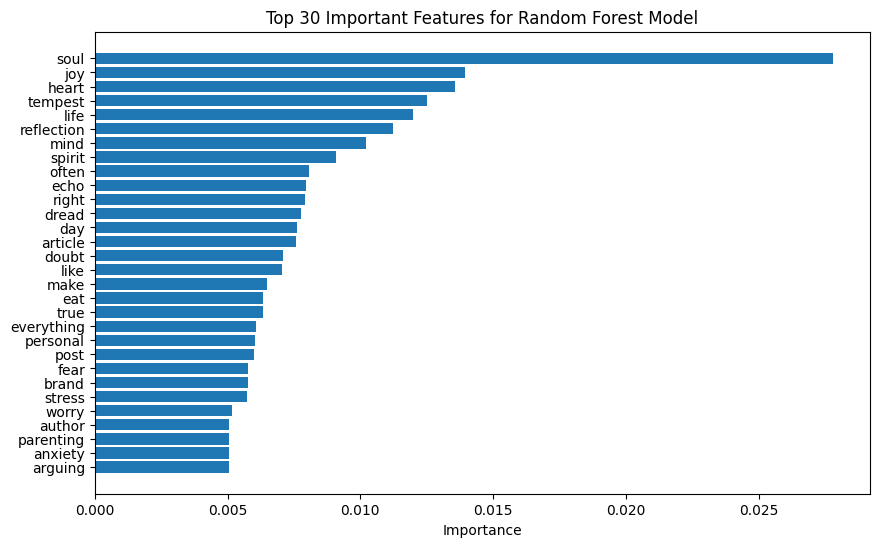

In [17]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:30][::-1], importance_df['Importance'][:30][::-1])
plt.xlabel('Importance')
plt.title('Top 30 Important Features for Random Forest Model')
plt.show()

### Top Feature Importances
- life (0.040851) and soul (0.036618) are the most significant features, indicating that mentions of these concepts might be particularly strong indicators of personality traits in your dataset.
- right (0.023794), parenting (0.022950), and heart (0.022402) also show meaningful contributions, suggesting that emotional and relational language could be influential.


## Model Validation

In [18]:
scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated RMSE: {(-scores.mean())**0.5}")

Cross-validated RMSE: 0.1380119127858545


### Cross-Validated RMSE
- The cross-validated RMSE of 0.1380 indicates the model's performance remains consistent across different subsets of the training data. This value is still relatively low, suggesting good predictive power.

# Saving model

In [19]:
import pickle

with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(best_rf, f)